In [1]:
import zipfile
import pandas as pd
import numpy as np
import json
import plotly

In [3]:
zips = zipfile.ZipFile('../data/Архив.zip')

In [4]:
from tqdm import tqdm
import traceback

data = []
for filename in tqdm(zips.namelist()):
    if 'json' not in filename:
        continue
    with zips.open(filename) as f:
        json_file = json.loads(f.read())
        try:
            item_data = {
                'item_id': json_file['id'],
                'company_vacancies_url': json_file['employer'].get('vacancies_url', 'None'),
                'item_url': json_file['alternate_url'],
                'has_premium': int(json_file['premium']),
                'billing_type': json_file['billing_type']['name'],
                'schedule': json_file['schedule']['name'],
                'name': json_file['name'],
                'area': json_file['area']['name'],
                'salary_from': np.nan if json_file.get('salary') is None else json_file['salary']['from'],
                'salary_to': np.nan if json_file.get('salary') is None else json_file['salary']['to'],
                'salary_currency': np.nan if json_file.get('salary') is None else json_file['salary']['currency'],
                'is_gross': np.nan if json_file.get('salary') is None else json_file['salary']['gross'],
                'address': json_file['address'],
                'allow_messages': json_file['allow_messages'],
                'experience': json_file['experience']['name'],
                'department': json_file['department'],
                'contacts': json_file['contacts'],
                'description': json_file['description'],
                'key_skills': json_file['key_skills'],
                'accept_handicapped': json_file['accept_handicapped'],
                'accept_kids': json_file['accept_kids'],
                'specializations': json_file['specializations'],
                'professional_roles': json_file['professional_roles'],
                'employer': json_file['employer']['name'],
                'published_at': json_file['published_at'],
                'working_days': json_file['working_days'],
                'working_time_intervals': json_file['working_days'],
                'working_time_modes': json_file['working_time_modes'],
                'accept_temporary': json_file['accept_temporary'],
                'languages': json_file['languages'],

            }
        except Exception as e:
            print(json_file)
            break
        data.append(item_data)

100%|██████████| 350476/350476 [01:11<00:00, 4905.41it/s]


In [5]:
df = pd.DataFrame(data)
df.drop_duplicates(subset=['item_id'], inplace=True)
df['item_id'] = df['item_id'].astype(np.int64)

In [7]:
df2 = df.merge(
    pd.read_csv('../data/frame.csv').drop_duplicates(subset=['0']),
    left_on = 'item_id',
    right_on = '0',
    how = 'left'
)

c:\Users\maksk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
df2.item_id.value_counts().sort_values(ascending=False).head(5)

76021760    1
76083230    1
76140602    1
76138553    1
76130357    1
Name: item_id, dtype: int64

In [9]:
df2.salary_from.notna().sum()

159776

In [11]:
df2.salary_from

0         30000.0
1             NaN
2         80000.0
3             NaN
4             NaN
           ...   
224815        NaN
224816    45000.0
224817    60000.0
224818    40000.0
224819    30000.0
Name: salary_from, Length: 224820, dtype: float64

<AxesSubplot:>

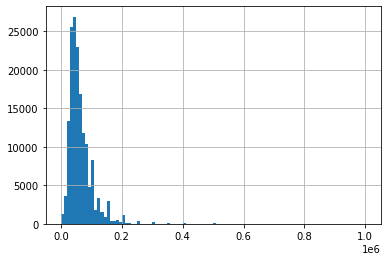

In [13]:
df2.salary_from.hist(bins=100, range=[0, 1_000_000])

In [14]:
df2['salary_log'] = np.log(df2['salary_from'])

<AxesSubplot:>

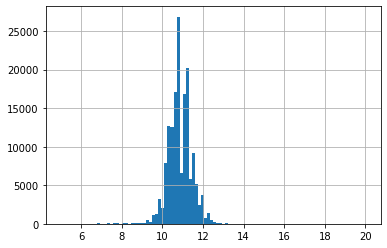

In [19]:
df2.salary_log.hist(bins=100, range=[5, 20])



In [20]:
df2.to_csv('../data/dataset.csv', index=False)

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
df2.head()

,item_id,company_vacancies_url,item_url,has_premium,billing_type,schedule,name,area,salary_from,salary_to,salary_currency,is_gross,address,allow_messages,experience,department,contacts,description,key_skills_x,accept_handicapped,accept_kids,specializations,professional_roles,employer,published_at,working_days,working_time_intervals,working_time_modes,accept_temporary,languages,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,key_skills_y,salary_log
0,74293318,https://api.hh.ru/vacancies?employer_id=18068,https://hh.ru/vacancy/74293318,0,Стандарт,Полный день,Оператор ЭВМ,Москва,30000.0,30000.0,RUR,False,"{'city': 'Москва', 'street': 'улица Кульнева',...",True,От 1 года до 3 лет,None,None,<strong>Обязанности:</strong> <ul> <li> <p>Вып...,"[{'name': 'Пользователь ПК'}, {'name': 'Грамот...",False,False,[],"[{'id': '84', 'name': 'Оператор ПК, оператор б...",Нефросовет,2022-12-27T09:11:47+0300,[],[],[],True,[],74293318,False,Оператор ЭВМ,Москва,30000.0,30000.0,RUR,False,улица Кульнева,NaN,NaN,2022-12-27T09:11:47+0300,Полный день,https://hh.ru/vacancy/74293318,5,Административный персонал,84,"Оператор ПК, оператор базы данных",NaN,10.308953
1,74057724,https://api.hh.ru/vacancies?employer_id=2781539,https://hh.ru/vacancy/74057724,0,Стандарт плюс,Полный день,Сервисный консультант,Наро-Фоминск,NaN,NaN,NaN,NaN,"{'city': 'Наро-Фоминск', 'street': 'улица Марш...",False,От 3 до 6 лет,None,None,<strong>Обязанности:</strong> <ul> <li>Анализ ...,"[{'name': 'Клиентоориентированность'}, {'name'...",False,False,[],"[{'id': '62', 'name': 'Мастер-приемщик'}]",Нара Авто Транс,2023-02-23T17:52:53+0300,[],[],[],False,[],74057724,False,Сервисный консультант,Наро-Фоминск,NaN,NaN,NaN,NaN,улица Маршала Жукова,NaN,NaN,2023-01-25T17:42:04+0300,Полный день,https://hh.ru/vacancy/74057724,19,Автомобильный бизнес,62,Мастер-приемщик,NaN,NaN
2,71654893,https://api.hh.ru/vacancies?employer_id=3086566,https://hh.ru/vacancy/71654893,0,Стандарт,Полный день,Мастер-приемщик СТО,Ивантеевка,80000.0,100000.0,RUR,False,"{'city': 'Ивантеевка', 'street': 'улица Толмач...",True,От 1 года до 3 лет,None,None,"<p>ООО &quot;ТК Арион&quot; - это крупная, ста...","[{'name': 'Знание устройства автомобиля'}, {'n...",False,False,[],"[{'id': '62', 'name': 'Мастер-приемщик'}]",ТК Арион,2023-01-18T11:07:33+0300,[],[],[],False,[],71654893,False,Мастер-приемщик СТО,Ивантеевка,80000.0,100000.0,RUR,False,улица Толмачёва,NaN,NaN,2023-01-18T11:07:33+0300,Полный день,https://hh.ru/vacancy/71654893,19,Автомобильный бизнес,62,Мастер-приемщик,NaN,11.289782
3,72724350,https://api.hh.ru/vacancies?employer_id=181500,https://hh.ru/vacancy/72724350,0,Стандарт,Полный день,Генеральный директор Флота (шиппинг),Москва,NaN,NaN,NaN,NaN,None,True,Более 6 лет,None,None,<p>Мы в поиске Генерального Директора в крупну...,"[{'name': 'Организаторские навыки'}, {'name': ...",False,False,[],"[{'id': '26', 'name': 'Генеральный директор, и...",Swift Technical,2022-12-21T10:59:59+0300,[],[],[],False,[],72724350,False,Генеральный директор Флота (шиппинг),Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-21T10:59:59+0300,Полный день,https://hh.ru/vacancy/72724350,26,Высший и средний менеджмент,26,"Генеральный директор, исполнительный директор ...",NaN,NaN
4,74055719,https://api.hh.ru/vacancies?employer_id=4752502,https://hh.ru/vacancy/74055719,0,Стандарт,Полный день,Переводчик с венгерского языка / технический п...,Москва,NaN,NaN,NaN,NaN,"{'city': 'Москва', 'street': 'Дербеневская наб...",True,От 1 года до 3 лет,None,None,"<p>На машиностроительное предприятие, выпускаю...","[{'name': 'Грамотная речь'}, {'name': 'Английс...",False,False,[],"[{'id': '93', 'name': 'Переводчик'}]",МАЙ НЬЮ ДЖОБ ДЕВЕЛОПМЕНТ КОМПАНИ,2023-01-13T15:07:11+0300,[],[],[],False,"[{'id': 'hun', 'name': 'Венгерский', 'level': ...",74055719,False,Переводчик с венгерского языка / технический п...,Москва,NaN,NaN,NaN,NaN,Дербеневская набережная,NaN,NaN,2023-01-13T15:07:11+0300,Полный день,https://hh.ru/vacancy/74055719,5,Административный персонал,93,Переводчик,NaN,NaN


In [23]:
df2.key_skills_x.notna()

0         True
1         True
2         True
3         True
4         True
          ... 
224815    True
224816    True
224817    True
224818    True
224819    True
Name: key_skills_x, Length: 224820, dtype: bool